## NLP ASSIGNMENT COMPONENT

### FEATURE EXTRACTION 

### BALA MURUGAN - 225229150

In [2]:
import numpy as np 
import pandas as pd
import spacy
import seaborn as sns
import string

### Logloss for this competition


In [3]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

* https://spacy.io/
spaCy is the best way to prepare text for deep learning. It interoperates seamlessly with TensorFlow, PyTorch, scikit-learn, Gensim and the rest of Python's awesome AI ecosystem. With spaCy, you can easily construct linguistically sophisticated statistical models for a variety of NLP problems.

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
#READING INPUT
data = pd.read_csv("train.csv")
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
test = pd.read_csv("test.csv")

# Tokenisation

* the process of breaking up the original text into components (tokens)

In [7]:
doc = nlp(data["text"][0])
for token in doc[0:5]:
    print(token.text, token.pos , token.pos_, token.dep_) # part of speach and syntax dependency

This 90 DET det
process 92 NOUN nsubj
, 97 PUNCT punct
however 86 ADV advmod
, 97 PUNCT punct


# Lemmatisation

* in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In [8]:
for token in doc[0:5]:
    print(token.text,  token.pos_, token.lemma_) # part of speach and syntax dependency

This DET this
process NOUN process
, PUNCT ,
however ADV however
, PUNCT ,


# target

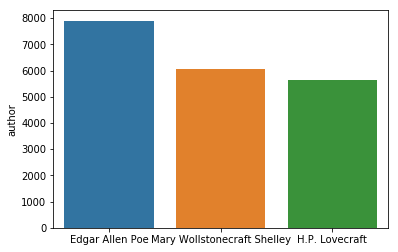

In [9]:
sns.barplot(x=['Edgar Allen Poe', 'Mary Wollstonecraft Shelley', 'H.P. Lovecraft'], y=data['author'].value_counts())

In [10]:
data['author_num'] = data["author"].map({'EAP':0, 'HPL':1, 'MWS':2})
data.head()

,id,text,author,author_num
0,id26305,"This process, however, afforded me no means of...",EAP,0
1,id17569,It never once occurred to me that the fumbling...,HPL,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1


we map "EAP" to 0 "HPL" to 1 and "MWS" to 2 as it will be more convenient for our classifier. 
In other words we are just telling our computer that if classifier predicts 0 for the text then it means that it is preicting "EAP", if 1 then it means that it is predicting "HPL", if 2 then it means that it is predicting "MWS".

# Meta features

* features that are extracted from the text like number of words, number of stop words, number of punctuations etc Number of words in the text
* Number of unique words in the text
* Number of characters in the text
* Number of stopwords
* Number of punctuations
* Number of upper case words
* Number of title case words


In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
## Number of words in the text ##
data["num_words"] = data["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))
## Number of unique words in the text ##
data["num_unique_words"] = data["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))
## Number of characters in the text ##
data["num_chars"] = data["text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["text"].apply(lambda x: len(str(x)))
## Number of stopwords in the text ##
data["num_stopwords"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
## Number of punctuations in the text ##
data["num_punctuations"] =data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
## Number of title case words in the text ##
data["num_words_upper"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
## Number of title case words in the text ##
data["num_words_title"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
## Max length of the words in the text ##
data["max_word_len"] = data["text"].apply(lambda x: np.max([len(w) for w in str(x).split()]))
test["max_word_len"] = test["text"].apply(lambda x: np.max([len(w) for w in str(x).split()]))

# Spacy



In [13]:


# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in string.punctuation]
        #tokens = [tok for tok in tokens if tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [14]:
print('Original training data shape: ', data['text'].shape)
data["text_cleaned"]= cleanup_text(data['text'], logging=True)
print('Cleaned up training data shape: ', data["text_cleaned"].shape)

Original training data shape:  (19579,)
Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.
Cleaned up training data shape:  (19579,)


In [15]:
print('Original training data shape: ', test['text'].shape)
test["text_cleaned"] = cleanup_text(test['text'], logging=True)
print('Cleaned up training data shape: ', test["text_cleaned"].shape)

Original training data shape:  (8392,)
Processed 1000 out of 8392 documents.
Processed 2000 out of 8392 documents.
Processed 3000 out of 8392 documents.
Processed 4000 out of 8392 documents.
Processed 5000 out of 8392 documents.
Processed 6000 out of 8392 documents.
Processed 7000 out of 8392 documents.
Processed 8000 out of 8392 documents.
Cleaned up training data shape:  (8392,)


## feature extraction on Spacy

In [16]:

data["num_unique_words_clenaed"] = data["text_cleaned"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words_cleaned"] = test["text_cleaned"].apply(lambda x: len(set(str(x).split())))

In [17]:
def numberOfADV(docs, logging=False):
    numberOfADV = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADP']
        #tokens = [tok for tok in tokens if tok not in stopwords and tok not in string.punctuation]
        #tokens = [tok for tok in tokens if tok not in punctuations]
        #tokens = ' '.join(tokens)
        
        numberOfADV.append(len(tokens))
    return pd.Series(numberOfADV)

In [18]:
data["num_of_ADV"] = numberOfADV(data['text_cleaned'], logging=True)

Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.


In [19]:
test["num_of_ADV"] = numberOfADV(test['text_cleaned'], logging=True)

Processed 1000 out of 8392 documents.
Processed 2000 out of 8392 documents.
Processed 3000 out of 8392 documents.
Processed 4000 out of 8392 documents.
Processed 5000 out of 8392 documents.
Processed 6000 out of 8392 documents.
Processed 7000 out of 8392 documents.
Processed 8000 out of 8392 documents.


In [20]:
def numberOfADJ(docs, logging=False):
    numberOfADV = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ']
        
        numberOfADV.append(len(tokens))
    return pd.Series(numberOfADV)

In [21]:
data["num_of_ADJ"] = numberOfADJ(data['text_cleaned'], logging=True)

Processed 1000 out of 19579 documents.
Processed 2000 out of 19579 documents.
Processed 3000 out of 19579 documents.
Processed 4000 out of 19579 documents.
Processed 5000 out of 19579 documents.
Processed 6000 out of 19579 documents.
Processed 7000 out of 19579 documents.
Processed 8000 out of 19579 documents.
Processed 9000 out of 19579 documents.
Processed 10000 out of 19579 documents.
Processed 11000 out of 19579 documents.
Processed 12000 out of 19579 documents.
Processed 13000 out of 19579 documents.
Processed 14000 out of 19579 documents.
Processed 15000 out of 19579 documents.
Processed 16000 out of 19579 documents.
Processed 17000 out of 19579 documents.
Processed 18000 out of 19579 documents.
Processed 19000 out of 19579 documents.


In [22]:
test["num_of_ADJ"] = numberOfADJ(test['text_cleaned'], logging=True)

Processed 1000 out of 8392 documents.
Processed 2000 out of 8392 documents.
Processed 3000 out of 8392 documents.
Processed 4000 out of 8392 documents.
Processed 5000 out of 8392 documents.
Processed 6000 out of 8392 documents.
Processed 7000 out of 8392 documents.
Processed 8000 out of 8392 documents.


In [23]:
data.head()

,id,text,author,author_num,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,max_word_len,text_cleaned,num_unique_words_clenaed,num_of_ADV,num_of_ADJ
0,id26305,"This process, however, afforded me no means of...",EAP,0,41,35,231,19,7,2,3,12,process however afford means ascertain dimensi...,21,1,2
1,id17569,It never once occurred to me that the fumbling...,HPL,1,14,14,71,8,1,0,1,8,never occur fumbling might mere mistake,6,0,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0,36,32,200,16,5,0,1,13,left hand gold snuff box caper hill cut manner...,18,0,3
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2,34,32,206,13,4,0,4,9,lovely spring look windsor terrace sixteen fer...,20,1,5
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1,27,25,174,11,4,0,2,14,find nothing else even gold superintendent aba...,16,0,0


In [24]:
test.head()

,id,text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,max_word_len,text_cleaned,num_unique_words_cleaned,num_of_ADV,num_of_ADJ
0,id02310,"Still, as I urged our leaving Ireland with suc...",19,19,110,9,3,1,3,11,still urge leave ireland inquietude impatience...,10,0,1
1,id24541,"If a fire wanted fanning, it could readily be ...",62,49,330,33,7,1,3,11,fire want fan could readily fan newspaper gove...,27,0,2
2,id00134,And when they had broken down the frail door t...,33,30,189,15,3,0,1,9,break frail door find two cleanly pick human s...,17,0,2
3,id27757,While I was thinking how I should possibly man...,41,34,223,19,5,2,3,9,think possibly manage without one actually tum...,20,2,4
4,id04081,I am not sure to what limit his knowledge may ...,11,11,53,6,1,1,1,9,sure limit knowledge may extend,5,0,1


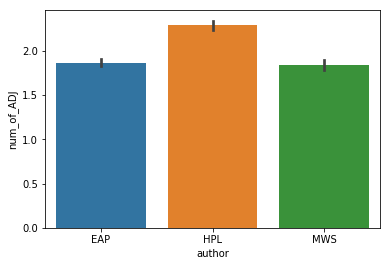

In [25]:
sns.barplot(x= data["author"], y = data["num_of_ADJ"])

## Vectorisation

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vect = CountVectorizer()

In [29]:
X_train_matrix = vect.fit_transform(data["text_cleaned"]) 
X_test_matrix = vect.transform(test["text_cleaned"]) 

In [30]:
features = vect.get_feature_names()
df_X_train_matrix = pd.DataFrame(X_train_matrix.toarray(), columns=features)
df_X_train_matrix.head()


,aaem,ab,aback,abaft,abandon,abandonment,abaout,abased,abasement,abashed,...,æmilianus,æneid,ærial,æronaut,ærostation,æschylus,élite,émeute,οἶδα,υπνος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_X_test_matrix = pd.DataFrame(X_test_matrix.toarray(), columns=features)
df_X_test_matrix.head()

,aaem,ab,aback,abaft,abandon,abandonment,abaout,abased,abasement,abashed,...,æmilianus,æneid,ærial,æronaut,ærostation,æschylus,élite,émeute,οἶδα,υπνος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatenate

In [32]:
data_df = data.drop(["id","text", "text_cleaned", "author"], axis = 1)

df_train = pd.concat([data_df, df_X_train_matrix], axis=1)

test_df = test.drop(["id","text", "text_cleaned"], axis = 1)

df_test = pd.concat([test_df, df_X_test_matrix], axis=1)

In [33]:
df_train.head()

,author_num,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,max_word_len,num_unique_words_clenaed,...,æmilianus,æneid,ærial,æronaut,ærostation,æschylus,élite,émeute,οἶδα,υπνος
0,0,41,35,231,19,7,2,3,12,21,...,0,0,0,0,0,0,0,0,0,0
1,1,14,14,71,8,1,0,1,8,6,...,0,0,0,0,0,0,0,0,0,0
2,0,36,32,200,16,5,0,1,13,18,...,0,0,0,0,0,0,0,0,0,0
3,2,34,32,206,13,4,0,4,9,20,...,0,0,0,0,0,0,0,0,0,0
4,1,27,25,174,11,4,0,2,14,16,...,0,0,0,0,0,0,0,0,0,0


# X and y

In [34]:
X = df_train.drop("author_num", axis = 1)
y = data['author_num']

## Split training and test data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y)

## Model

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

print (clf.score(X_test, y_test))

0.8994949208330969
0.8345250255362615


In [37]:
predicted_result=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       790
           1       0.89      0.76      0.82       564
           2       0.83      0.85      0.84       604

    accuracy                           0.83      1958
   macro avg       0.84      0.83      0.83      1958
weighted avg       0.84      0.83      0.83      1958



In [38]:
predictions = clf.predict_proba(X_test)

print ("logloss: %0.3f " % multiclass_logloss(y_test, predictions))

logloss: 0.454 


# Submission

In [39]:
sample = pd.read_csv("/kaggle/input/spooky-author-identification/sample_submission.csv")
sample.head()

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698
3,id27757,0.403494,0.287808,0.308698
4,id04081,0.403494,0.287808,0.308698


In [40]:

predicted_result = clf.predict_proba(df_test)

In [41]:
result=pd.DataFrame()
result["id"]=test["id"]
result["EAP"]=predicted_result[:,0]
result["HPL"]=predicted_result[:,1]
result["MWS"]=predicted_result[:,2]
result.head()

,id,EAP,HPL,MWS
0,id02310,0.002565,0.001174,9.962615e-01
1,id24541,0.999579,0.000180,2.406053e-04
2,id00134,0.236085,0.763903,1.182107e-05
3,id27757,0.052882,0.947118,3.199258e-08
4,id04081,0.989892,0.004978,5.130243e-03


In [42]:
result.to_csv("submission_v3.csv", index=False)